In [1]:
import numpy as np
import pandas as pd
from os import listdir
from os.path import isfile, join
import json
import time
import nltk
from nltk.util import ngrams
import re
from progressbar import ProgressBar
from tqdm import tqdm
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.tokenize import regexp_tokenize
import nltk.data 
import matplotlib.pyplot as plt
import pickle
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
import operator


In [2]:
# To use sentence and word tokenizers later
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\surta\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\surta\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\surta\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

### Extracting the data from the json files and storing in drive



In [3]:
path = 'C:/Users/surta/Downloads/pdf_json'
start = time.time()
filenames = [f for f in listdir(path) if isfile(join(path, f))]
end = time.time()

In [4]:
# Displaying the total number of json files in the shared drive folder
print("The total number of files found: ", len(filenames))

The total number of files found:  56528


In [5]:
def extract_text(text):
    title_meta = []
    title_meta.append(text['metadata']['title'])
    text_abstract = [text['abstract'][entry]['text'] for entry in range(len(text['abstract']))]
    text_bodytext = [text['body_text'][entry]['text'] for entry in range(len(text['body_text']))]

    full_text = title_meta + text_abstract + text_bodytext
    return full_text

final_text = []
for i in tqdm(range(len(filenames))):
    file_name = open(path+'/'+filenames[i])
    text = json.loads(file_name.read())
    final_text.append(extract_text(text))

100%|███████████████████████████████████████████████████████████████████████████| 56528/56528 [01:22<00:00, 681.31it/s]


In [6]:
final_str_text = [' '.join(final_text[i]) for i in range(len(final_text))]

Pre-processing steps

*   Lower casing
*   Remove Stop words

*   Remove punctuations like !()-[]{};:'"\,<>./?@#$%^&*_~
*   Remove website URLs
*   Remove non-alphanumeric characters i.e. everything except 
*   Remove numbers[0-9], letters and _


*   Remove strings which look like dates for e.g. **12/23/2016** and times **12:34:56**. Also remove strings which also are **am** or **pm** which are probably part of the preceding time in the source list
*   Lemmatization




In [7]:
def preprocessing(data):
    text_lower = data.lower()

    STOPWORDS = set(stopwords.words('english'))
    text_stop = " ".join([word for word in text_lower.split() if word not in STOPWORDS])

    text_punc = re.sub(r'[^\w\s]', '', text_stop)
    text_url = re.sub(r'https?://\S+|www\.\S+', '', text_punc)

    text_date = re.sub(r'^(?:(?:[0-9]{2}[:\/,]){2}[0-9]{2,4}|am|pm)$', '', text_url)
    
    # removing non-alphanumeric characters
    text_alnum = re.sub(r'\W+', ' ', text_date)

    # removing numbers (0-9)
    text_number = re.sub(r'[0-9]+', '', text_alnum)
    
    wordnet_lemmatizer = WordNetLemmatizer()
    text_lemma = " ".join([wordnet_lemmatizer.lemmatize(word) for word in text_number.split(" ")])

    return text_lemma

In [8]:
import nltk
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\surta\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [9]:
with open('preprocessed_final_with_dot.txt', 'w', encoding = 'utf8') as f:
    for item in tqdm(range(len(final_str_text))):
        if item != '':
            # temp = ' '.join(item.split())
            # to keep one line space between documents
            f.write("%s\n" % preprocessing(final_str_text[item]))

100%|████████████████████████████████████████████████████████████████████████████| 56528/56528 [16:30<00:00, 57.06it/s]


In [10]:
with open('C:/Users/surta/Downloads/preprocessed_final_with_dot.txt', 'r', encoding = "utf8") as f:
    pre_text = f.readlines()

MemoryError: 

In [ ]:
assert len(pre_text) == 56528

In [9]:
from sklearn.feature_extraction.text import CountVectorizer

# Counting frequency of occurence of each word in the corpus
vectorizer = CountVectorizer()

# tokenize and build vocab
vectorizer.fit(pre_text)

MemoryError: 

In [ ]:
vocab_dict = vectorizer.vocabulary_

## MANDELBROT APPROXIMATION to calculate alpha

In [ ]:
rank_df = pd.DataFrame(list(vocab_dict.items()), columns = ['Word', 'Frequency'])
rank_df.sort_values(by = ['Frequency'], inplace = True, ascending = False)
rank_df['Rank'] = list(range(1, len(rank_df) + 1))

In [ ]:
rank = 1
beta = 2.7
rank_df['Alpha'] = -np.log2(rank_df['Frequency']) // np.log2(rank_df['Rank'] + beta)

In [ ]:
rank_df.head()

In [ ]:
rank_df.to_csv('rank_dataframe.csv')

In [ ]:
print("The average value of alpha is", rank_df['Alpha'].mean())

##### The average value of alpha is -1.5

In [18]:
combined_text = ' '.join(pre_text)

In [19]:
vocab_list = []
words_list = []
vocab = set()
for num_word, word in tqdm(enumerate(list(combined_text.split(" ")))):
    if word not in vocab: # to keep track of the vocabulary
        vocab.add(word)

    if num_word % 10000 == 0:
        words_list.append(num_word + 1)
        vocab_list.append(len(vocab))

146477542it [08:02, 303761.59it/s]


### Plot to verify Heap's law

#### **Heap's law**:  $M = kT^b$, 
where M = Estimated vocabulary, T = Number of tokens, k and b are constants associated with the law.

Now, $M = kT^b \implies log(M) = log(k) + b \times log(T)$

We will plot log(M) vs log(T), for both actual and estimated values of M.

#### Estimating the parameters (k and b) based on the data



We take the first two pairs of observed values to estimate b and k

In [20]:
# converting to logs
log_M = np.log(vocab_list)
log_T = np.log(words_list)

In [21]:
# estimating parameters based on first two values
b = (log_M[1] - log_M[0]) / (log_T[1] - log_T[0])
log_k = log_M[1] - b * log_T[1]

# displaying the estimated parameters
print("b = ", b,", log(k) = ",log_k)

b =  0.8586728129894433 , log(k) =  0.0


In [22]:
# estimating the vocabulary by Heap's law
estimated_vocab = []

# to estimate vocabulary using Heap's law
for i in log_T:
    estimated_vocab.append(log_k + b * i)

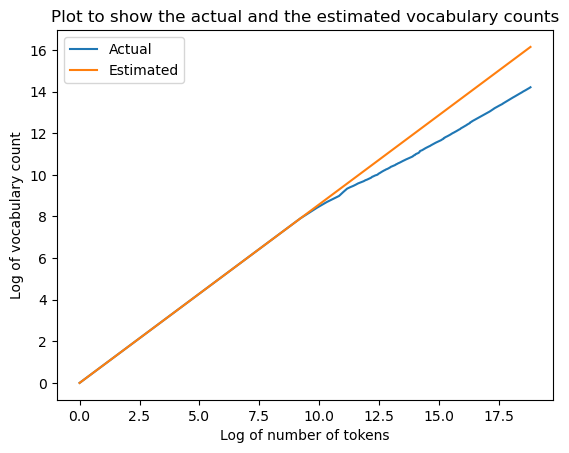

In [23]:
# plotting the graph of actual vocabulary values and the estimated vocabulary values (Heap's law)
plt.plot(log_T, log_M, label = "Actual")
plt.plot(log_T, estimated_vocab, label = "Estimated")
plt.xlabel("Log of number of tokens")
plt.ylabel("Log of vocabulary count")
plt.title("Plot to show the actual and the estimated vocabulary counts")
plt.legend()
plt.show()

#### We can clearly see that the estimated curve is a straight line but the actual curve sort of deviates from the line. This could be due to the fact that we have estimated the parameters of Heap's law based on the first two observations.  

#### Fixing the parameters (k and b) based on existing literature

We take k = 45 and b = 0.499

In [24]:
# k and b values based on existing literature
log_k = np.log(45)
b = 0.499

estimated_vocab = []
# to estimate vocabulary using Heap's law
for i in log_T:
    estimated_vocab.append(log_k + b * i)

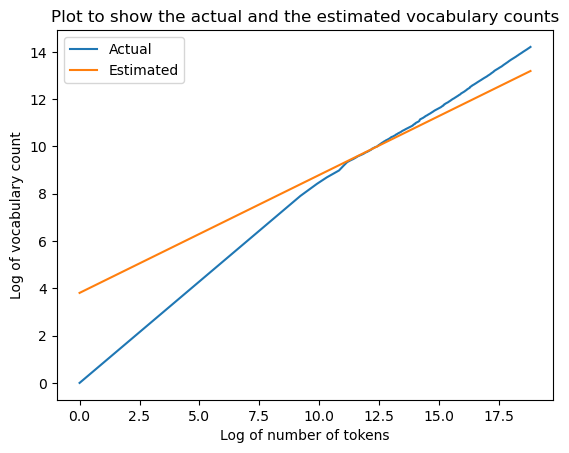

In [25]:
# plotting the graph of actual vocabulary values and the estimated vocabulary values (Heap's law)
plt.plot(log_T, log_M, label = "Actual")
plt.plot(log_T, estimated_vocab, label = "Estimated")
plt.xlabel("Log of number of tokens")
plt.ylabel("Log of vocabulary count")
plt.title("Plot to show the actual and the estimated vocabulary counts")
plt.legend()
plt.show()

#### Even here the estimated curve is a straight line but the actual curve sort of deviates from the line on either side. This can be attributed to the data we have taken as Heap's law provides a rough estimate and cannot predict with certainty. 